#[محمد وليد الطرزي]

Prepare libraries and data

In [1]:
import import_ipynb 
import json
import waleed_preprocess as waleed
import pandas as pd
import sklearn as sk
import seaborn as sns
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence


importing Jupyter notebook from waleed_preprocess.ipynb


قراءة وكتابة للدكشنري عشان ساعات بتتعبى الرام فاضطر اعمل ريستارت للكرنل وحاجات يعني 

In [2]:
def write_dic(dic,name):
    json.dump(dic, open(name+".txt",'w'))

In [3]:
def read_dic(name):
    return json.load(open(name+".txt"))

Prapere The Comparison Dictionary

In [4]:
model_comparison_table = {}

model_comparison_table['question_step_number'] = []
model_comparison_table['model_name'] = []
model_comparison_table['parameters'] = []
model_comparison_table['preprocessing_methods'] = []
model_comparison_table['accuracy'] = []

# Question [1]: Load the data

شرح ما يقوم به الكود

In [5]:
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')

In [6]:
print('shape of train(befor processing) ->',train_data.shape[0])
print('shape of validation(befor processing) ->',val_data.shape[0])
print('shape of test(befor processing) ->',test_data.shape[0])

shape of train(befor processing) -> 33924
shape of validation(befor processing) -> 7269
shape of test(befor processing) -> 7270


delete nan and duplicated values

In [6]:
train_data = waleed.delete_nan_duplicates(train_data)
val_data = waleed.delete_nan_duplicates(val_data)
test_data = waleed.delete_nan_duplicates(test_data)

stander labelling for labels 

In [7]:
train_data['label'] = train_data['label'].apply(lambda word: waleed.label_standrlization(word))
val_data['label'] = val_data['label'].apply(lambda word: waleed.label_standrlization(word))
test_data['label'] = test_data['label'].apply(lambda word: waleed.label_standrlization(word))

recheck for nan and duplicate rows 

In [8]:
train_data = waleed.delete_nan_duplicates(train_data)
val_data = waleed.delete_nan_duplicates(val_data)
test_data = waleed.delete_nan_duplicates(test_data)

encode the labels as below:

In [9]:
def label_encoding(df,label,new_label):
    encoder = sk.preprocessing.LabelEncoder()
    values = df[label].unique()
    encoder.fit(values)
    df[new_label] = encoder.transform(df[label])
    keys = encoder.classes_
    values = encoder.transform(encoder.classes_)
    dictionary = dict(zip(keys, values))
    print(dictionary)

splitting DataFrame by labels 

In [10]:
def split_by_label(df, column, val1, val2):
    return df[(df[column] == val1) | (df[column] == val2 )]

In [11]:
new_label = 'label_val'
print('train data labels: ')
label_encoding(train_data,'label',new_label)
print('validatin data labels: ')
label_encoding(val_data,'label',new_label)
print('test data labels: ')
label_encoding(test_data,'label',new_label)

train data labels: 
{'irrelevante': 0, 'negative': 1, 'neutral': 2, 'positive': 3}
validatin data labels: 
{'irrelevante': 0, 'negative': 1, 'neutral': 2, 'positive': 3}
test data labels: 
{'irrelevante': 0, 'negative': 1, 'neutral': 2, 'positive': 3}


so we need only: <br> 1--> negative <br> 3--> positive

In [12]:
train_data_bi = split_by_label(train_data,new_label,1,3)
val_data_bi = split_by_label(val_data,new_label,1,3)
test_data_bi = split_by_label(test_data,new_label,1,3)

In [14]:
print('shape of train(after processing) ->',train_data_bi.shape[0])
print('shape of validation(after processing) ->',val_data_bi.shape[0])
print('shape of test(after processing) ->',test_data_bi.shape[0])

shape of train(after processing) -> 11073
shape of validation(after processing) -> 2916
shape of test(after processing) -> 2945


In [13]:
# حال اختبار في حال وجودها
print(train_data_bi[train_data_bi['text'] == '  '])
print(train_data_bi[train_data_bi['text'] =='Nan'])
print(train_data_bi[train_data_bi['label'] ==' '])
train_data_bi[new_label].unique()

Empty DataFrame
Columns: [text, label, label_val]
Index: []
Empty DataFrame
Columns: [text, label, label_val]
Index: []
Empty DataFrame
Columns: [text, label, label_val]
Index: []


array([3, 1])

In [13]:
def x_y_split(df,x,y):
    return df[x].tolist(),df[y].tolist()

In [14]:
x_train, y_train = x_y_split(train_data_bi,'text',new_label)
x_val, y_val = x_y_split(val_data_bi,'text',new_label)
x_test, y_test = x_y_split(test_data_bi,'text',new_label)

# Question [2]: Baseline: Bag of Words with Logistic Regression

transform  a vector on the basis of the frequency (count) of each word that occurs in the entire text <br>
تحويل الداتا لفيكتور يعبّر عن تكرار الكلمة بالنص

In [15]:
def count_vec(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

تجربة افضل "سولفر" للريغرشن

In [19]:
# x_train,y_train = x_y_split(train_data_bi,'text',new_label)
# x_test,y_test = x_y_split(test_data_bi,'text',new_label)

In [20]:
# x_train_counts, count_vectorizer = count_vec(x_train)
# x_test_counts = count_vectorizer.transform(x_test) 

In [21]:
# solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# parameters = dict(solver=solver_list)
# lr = LogisticRegression(random_state=42)
# clf = GridSearchCV(lr, parameters, cv=5)
# clf.fit(x_train_counts, y_train)

In [22]:
# scores = clf.cv_results_['mean_test_score']
# for score, solver, in zip(scores, solver_list):
#     print(f"{solver}: {score:.3f}")

افضلهم على اساس بس saga <br>وقت جربت بعد عمليات التنظيف على التيست عطى قيمة أقل من السولفر الحالي  

فعدِلتُ عن الفكرة 

done testing

In [16]:
def logistic_Regressor(x_train , y_train , x_test , y_test , solver = 'liblinear', c=1 ):
    clf = LogisticRegression(random_state=40, solver=solver,C=c)
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_test)
    return accuracy_score(y_test , y_predicted)


تقسيم الداتا للفيتشرز والليبل واستدعاء الفيكتورايزر ثمّ التدريب(مجازيّاً) والتوقّع على الداتا المناسبة 

In [17]:
def my_model_cv(df_train,df_test):
    x_train,y_train = x_y_split(df_train,'text',new_label)
    x_test,y_test = x_y_split(df_test,'text',new_label)
    x_train_counts, count_vectorizer = count_vec(x_train)
    x_test_counts = count_vectorizer.transform(x_test) 
    accuracy = logistic_Regressor(x_train_counts, y_train, x_test_counts, y_test)
    return accuracy

In [130]:
accuracy = my_model_cv(train_data_bi , test_data_bi)
print(accuracy)

0.8067911714770798


In [131]:
model_comparison_table['question_step_number'].append("2")
model_comparison_table['model_name'].append("baseline logistic regression with bag of words")
model_comparison_table['parameters'].append("default")
model_comparison_table['preprocessing_methods'].append("none")
model_comparison_table['accuracy'].append(accuracy)

# Question [3]: Text Cleaning and Normalization on Bag of Words with Logistic Regression

Prapere The Comparison Dictionary for this step

In [27]:
bag_logistic_comparison_table = {}

bag_logistic_comparison_table['question_step_number'] = []
bag_logistic_comparison_table['preprocessing_methods'] = []
bag_logistic_comparison_table['accuracy'] = []

what I'm doing in each cell is:<br>
I'm copying the data_bi(only negative and positive tweets) then apply the functions needed<br> the reseaon for using the same variable is to save memory and the same for 
not making any new columns for cleaned tweets regarding each question<br>
"ممكن خلي الشرح انكليزي؟ عم اقدر عبّر اكتر "

## [3.1] 


In [28]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',delete_mentions = True)
waleed.preprocesse_df(val_data_3,'text',delete_mentions = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [29]:
accuracy = my_model_cv(train_data_3, val_data_3)
print(accuracy)

0.8047357584076871


In [30]:
bag_logistic_comparison_table['question_step_number'].append("3.1")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions")
bag_logistic_comparison_table['accuracy'].append(accuracy)

## [3.2] 

In [31]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
delete_hashtagss=True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
delete_hashtagss=True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [32]:
# test your model
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.7994505494505495


In [33]:
bag_logistic_comparison_table['question_step_number'].append("3.2")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + remove hashtags")
bag_logistic_comparison_table['accuracy'].append(accuracy)

الاطراف المنحازة قد تستخدم وسم/هاشتاغ معيّن 

  لايمكننا الاستفادة الكبيرة من ابقاء الهاشتاغات في حال اختلفت التويتات الجديدة لأن هذه الهاشتاغاية قد تكون تغييرت وتم استبدالها بهاشتاغاية أُخرى 

## [3.3] 

In [34]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
delete_repeateds = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
delete_repeateds = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [35]:
# test your model
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8047357584076871


In [36]:
bag_logistic_comparison_table['question_step_number'].append("3.3")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + remove repeated ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

it's kinda reasonable since there might not be a very repeated characters <br> there's no need to take this approach i guess

## [3.4] 

### [3.4.1] 

In [37]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [38]:
# test your model
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8057652711050103


In [39]:
bag_logistic_comparison_table['question_step_number'].append("3.4.1")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch to one type of numbers ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

switching to English numbers made a good resulte!

### [3.4.2] 

In [40]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
numbers_to_tags = True,)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
numbers_to_tags = True,)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [41]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8040494166094715


In [42]:
bag_logistic_comparison_table['question_step_number'].append("3.4.2")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + numbers to tags ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

switch numbers to tags didn't help 

### [3.4.3] 

In [43]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
delete_numberss = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
delete_numberss = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [44]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8047357584076871


In [45]:
bag_logistic_comparison_table['question_step_number'].append("3.4.3")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + delete numbers ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

well,<br> switching to one type of numbers accually is a good one 

## [3.5] 

### [3.5.1] 

In [46]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_non_arabis = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_non_arabis = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [47]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8046687263989015


In [48]:
bag_logistic_comparison_table['question_step_number'].append("3.5.1")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete non arabic ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

not helping :(

### [3.5.2] 

In [49]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [50]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8057652711050103


In [51]:
bag_logistic_comparison_table['question_step_number'].append("3.5.2")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

just a small improvment

### [3.5.3] 

In [52]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_emojiess = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_emojiess = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [53]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)


0.8050120151047031


In [54]:
bag_logistic_comparison_table['question_step_number'].append("3.5.3")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + delete punc + swith numbers + delete emojes ")
bag_logistic_comparison_table['accuracy'].append(accuracy)


emojies deleting made just a bit less accuracy!

افضل حل الى الان هو فقط الاكتفاء بمحو المينشنات والتغيير الى الارقام العربية وحذف علامات الترقيم 

## [3.6] 

In [55]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [56]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)


0.8094255245958032


In [57]:
bag_logistic_comparison_table['question_step_number'].append("3.6")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words")
bag_logistic_comparison_table['accuracy'].append(accuracy)

deleting stop words helped a LOT!!

## [3.7] 

لانه يأخذ وقت طويل جدا جداFARASA-stemmer لم يمكنني من استخدام <br>  nltk ISRIStemmer لجأت الى

In [58]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
steaming_texts = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
steaming_texts = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [59]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.7821748107364074


In [60]:
bag_logistic_comparison_table['question_step_number'].append("3.7")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words +stemmig the words")
bag_logistic_comparison_table['accuracy'].append(accuracy)

the lesson here is to **never** **ever** stemm Arabic words at ALL !

## [3.8] 

### [3.8.1] 

In [61]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
hamza_standardizations = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
hamza_standardizations = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [62]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8087375300997592


close to help but didn't help yet accually

In [63]:
bag_logistic_comparison_table['question_step_number'].append("3.8.1")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + standerlize hamza")
bag_logistic_comparison_table['accuracy'].append(accuracy)

### [3.8.2] 

In [64]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
aliphs_standardizations = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
aliphs_standardizations = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [65]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8001375988992088


also didn't help 

In [66]:
bag_logistic_comparison_table['question_step_number'].append("3.8.2")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + standerlize Aliph")
bag_logistic_comparison_table['accuracy'].append(accuracy)

### [3.8.3] 

In [67]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
tatwil_removers = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
tatwil_removers = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)


In [68]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8083275980729525


In [69]:
bag_logistic_comparison_table['question_step_number'].append("3.8.3")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + remove tatwil")
bag_logistic_comparison_table['accuracy'].append(accuracy)

also nothing is happening 

### [3.8.4] 

In [70]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
tanwin_removals = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
tanwin_removals = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

since this one also did good, why not doing both of them!

In [71]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8094255245958032


nothing at all happened and it does make sence since it's just Tanwin

In [72]:
bag_logistic_comparison_table['question_step_number'].append("3.8.4")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + remove tanwin")
bag_logistic_comparison_table['accuracy'].append(accuracy)

let's try mix of cleaning pre-proccess

In [73]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
# delete_emojiess = True,
hamza_standardizations = True,
tanwin_removals = True,
tatwil_removers = True,)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
# delete_emojiess = True,
hamza_standardizations = True,
tanwin_removals = True,
tatwil_removers = True,)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [74]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8079834824501032


In [75]:
bag_logistic_comparison_table['question_step_number'].append("3.8.7")
bag_logistic_comparison_table['preprocessing_methods'].append("remove (stope-words,punctuations,mentions,) ")
bag_logistic_comparison_table['accuracy'].append(accuracy)

## [3.9] 

In [76]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(val_data_3,'text',
delete_mentions = True,
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [77]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8094255245958032


In [78]:
bag_logistic_comparison_table['question_step_number'].append("3.9")
bag_logistic_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces")
bag_logistic_comparison_table['accuracy'].append(accuracy)

In [79]:
train_data_3 = train_data_bi.copy(deep = True)
val_data_3 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True
)

waleed.preprocesse_df(val_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True
)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
val_data_3 = waleed.delete_nan_duplicates(val_data_3)

In [80]:
accuracy = my_model_cv(train_data_3,val_data_3)
print(accuracy)

0.8097527472527473


In [81]:
bag_logistic_comparison_table['question_step_number'].append("3.random")
bag_logistic_comparison_table['preprocessing_methods'].append("delete punctuations + delete stope-words + white spaces + switch numbers")
bag_logistic_comparison_table['accuracy'].append(accuracy)

 من المفترض ان لاتختلف الدقّة عند حذف الفراغات لأنها غير ممثلة اساسا بالنموذج <br> وها هي ذا لم تختلف

## [3.10]

لا يوجد عمليات اضافية من القسم السابق

## Print Table

In [82]:
df = pd.DataFrame(bag_logistic_comparison_table)
df = df.sort_values(by = 'accuracy' , ascending = False)
df.head()

,question_step_number,preprocessing_methods,accuracy
17,3.random,delete punctuations + delete stope-words + whi...,0.809753
14,3.8.4,remove mentions + switch numbers + delete punc...,0.809426
16,3.9,remove mentions + switch numbers + delete punc...,0.809426
9,3.6,remove mentions + switch numbers + delete punc...,0.809426
11,3.8.1,remove mentions + switch numbers + delete punc...,0.808738


In [83]:
write_dic(bag_logistic_comparison_table,"bag_logistic_comparison_table")

## Your best model
ما هي العمليات الأفضل؟ اكتبها هنا<br>
remove(punctuations + stope-words + spaces) + switch numbers

In [132]:
train_data_3 = train_data_bi.copy(deep = True)
test_data_3 = test_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(test_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

train_data_3 = waleed.delete_nan_duplicates(train_data_3)
test_data_3 = waleed.delete_nan_duplicates(test_data_3)



In [134]:
accuracy = my_model_cv(train_data_3, test_data_3)
print(accuracy)

0.8085685141108466


In [135]:
model_comparison_table['question_step_number'].append("3")
model_comparison_table['model_name'].append("logistic regression with bag of words")
model_comparison_table['parameters'].append("solver: liblinear")
model_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces")
model_comparison_table['accuracy'].append(accuracy)

In [137]:
write_dic(model_comparison_table,"model_comparison_table")

# Question [4]: TF-IDF with Logistic Regression

Prapere The Comparison Dictionary for this step

In [103]:
tf_idf_comparison_table = {}

tf_idf_comparison_table['question_step_number'] = []
tf_idf_comparison_table['model_name'] = []
tf_idf_comparison_table['parameters'] = []
tf_idf_comparison_table['accuracy'] = []

## [4.1] 
شرح ما يقوم به الكود


In [104]:
train_data_4 = train_data_bi.copy(deep = True)
test_data_4 = test_data_bi.copy(deep = True)
val_data_4 = val_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_4,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(test_data_4,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(test_data_4,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)


train_data_4 = waleed.delete_nan_duplicates(train_data_4)
test_data_4 = waleed.delete_nan_duplicates(test_data_4)
val_data_4 = waleed.delete_nan_duplicates(val_data_4)

In [105]:
x_train_4,y_train_4 = x_y_split(train_data_4,'text',new_label)
x_test_4,y_test_4 = x_y_split(test_data_4,'text',new_label)
x_val_4,y_val_4 = x_y_split(val_data_4,'text',new_label)

In [106]:
# do code
def tf_idf(data,min_d=10,max_d=0.6,ng_range = (1, 2) ):
    tfidf_vec = TfidfVectorizer(min_df=min_d, max_df=max_d, ngram_range=ng_range)
    train = tfidf_vec.fit_transform(data)
    return train, tfidf_vec, 


In [107]:
x_train_tfidf, tfidf_vectorizer= tf_idf(x_train_4)
x_test_tfidf = tfidf_vectorizer.transform(x_test_4)
x_val_tfidf = tfidf_vectorizer.transform(x_val_4)


In [108]:
accuracy = logistic_Regressor(x_train_tfidf,y_train_4,x_val_tfidf,y_val_4)
print(accuracy)

0.733196159122085


In [109]:
tf_idf_comparison_table['question_step_number'].append("4.1")
tf_idf_comparison_table['model_name'].append("logistic regression with TF_IDF")
tf_idf_comparison_table['parameters'].append("min_df=10, max_df=0.6, ngram_range=(1, 2)")
tf_idf_comparison_table['accuracy'].append(accuracy)

## [4.2] 

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])
parameters = {
    'tfidf__max_df': (0.25, 0.45, 0.5, 0.6 ,0.7),
    'tfidf__min_df': (3,5,10, 15, 25,),
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'clf__C': [0.01, 0.1, 1, 3, 6, 100],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(x_train_4, y_train_4)

Fitting 2 folds for each of 240 candidates, totalling 480 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=2,
             param_grid={'clf__C': [0.01, 0.1, 1, 3, 6, 100],
                         'tfidf__max_df': (0.25, 0.45, 0.5, 0.6, 0.7),
                         'tfidf__min_df': (5, 10, 15, 25),
                         'tfidf__ngram_range': [(1, 2), (1, 3)]},
             verbose=3)

In [ ]:
print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) 

Best parameters set:
[('tfidf', TfidfVectorizer(max_df=0.7, min_df=5, ngram_range=(1, 3))), ('clf', LogisticRegression(C=3))]


In [97]:
x_train_tfidf, tfidf_vectorizer= tf_idf(x_train_4,max_d=0.7,min_d=5,ng_range=(1,3))
x_test_tfidf = tfidf_vectorizer.transform(x_test_4)
x_val_tfidf = tfidf_vectorizer.transform(x_val_4)

In [110]:
accuracy = logistic_Regressor(x_train_tfidf,y_train_4,x_val_tfidf,y_val_4,c=3,)
print(accuracy)

0.7349108367626886


In [111]:
tf_idf_comparison_table['question_step_number'].append("4.2")
tf_idf_comparison_table['model_name'].append("logistic regression with TF_IDF")
tf_idf_comparison_table['parameters'].append("min_df=5, max_df=0.7, ngram_range=(1, 3) , C=3")
tf_idf_comparison_table['accuracy'].append(accuracy)

In [112]:
write_dic(tf_idf_comparison_table,"tf_idf_comparison_table")

## [4.3] 

extra

## Print Table

In [113]:
tf_idf_comparison_table = read_dic("tf_idf_comparison_table")

In [115]:
df = pd.DataFrame(tf_idf_comparison_table)
df = df.sort_values(by = 'accuracy' , ascending = False)
df

,question_step_number,model_name,parameters,accuracy
1,4.2,logistic regression with TF_IDF,"min_df=5, max_df=0.7, ngram_range=(1, 3) , C=3",0.734911
0,4.1,logistic regression with TF_IDF,"min_df=10, max_df=0.6, ngram_range=(1, 2)",0.733196


## Your best model
ما هو النموذج الأفضل؟ اكتبه هنا

In [138]:
# test the model
accuracy = logistic_Regressor(x_train_tfidf,y_train_4,x_test_tfidf,y_test_4,c=3,)
print(accuracy)

0.7436246174770487


In [140]:
model_comparison_table['question_step_number'].append("4")
model_comparison_table['model_name'].append("logistic regression with tf-idf")
model_comparison_table['parameters'].append("solver: liblinear, min_df=5, max_df=0.7, ngram_range=(1, 3) , C=3")
model_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces")
model_comparison_table['accuracy'].append(accuracy)

In [141]:
write_dic(model_comparison_table,"model_comparison_table")

# Question [5]: Deep NN

Prapere The Comparison Dictionary for this step

In [18]:
dnn_comparison_table = {}

dnn_comparison_table['question_step_number'] = []
dnn_comparison_table['model_name'] = []
dnn_comparison_table['parameters'] = []
dnn_comparison_table['accuracy'] = []

## [5.1] 
شرح ما يقوم به الكود


In [40]:
from keras.backend import clear_session
clear_session()

تبديل قم الايجابي=3 الى 1 والسلبي=1 الى 0

In [41]:
def swap(val):
    if val == 3:
        return 1
    elif val == 1 :
        return 0

In [21]:
#  dklfjdsklfjlkdj lkdsjflksj fklj ldsjf ldsjldsj flkdjfldsj fldj fldsjf
# ldskjfkdsjfljfkld djffdasdsd
#  dfjds hfjf dsajfkl dsaf jdashf uip erf erhf reipu fgrei hfierfoeriwh re

In [42]:
train_data_5 = train_data_bi.copy(deep = True)
val_data_5 = val_data_bi.copy(deep = True)
test_data_5 = test_data_bi.copy(deep = True)

waleed.preprocesse_df(train_data_5,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(val_data_5,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(test_data_5,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

In [43]:
train_data_5.to_csv('train_data_5.csv')
test_data_5.to_csv('test_data_5.csv')
val_data_5.to_csv('val_data_5.csv')

In [44]:
test_data_5['bi'] = test_data_5[new_label].apply(lambda val: swap(val))
train_data_5['bi']=train_data_5[new_label].apply(lambda val: swap(val))
val_data_5['bi']=val_data_5[new_label].apply(lambda val: swap(val))

In [45]:

sentences_train_5 = train_data_5['text'].to_numpy()
sentences_val_5 = val_data_5['text'].to_numpy()
sentences_test_5 = test_data_5['text'].to_numpy()

y_train_5 = train_data_5['bi'].to_numpy()
y_val_5  = val_data_5['bi'].to_numpy()
y_test_5  = test_data_5['bi'].to_numpy()

In [46]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train_5)

x_train_5 = vectorizer.transform(sentences_train_5)
x_val_5  = vectorizer.transform(sentences_val_5)
x_test_5  = vectorizer.transform(sentences_test_5)
x_train_5

<11073x52717 sparse matrix of type '<class 'numpy.int64'>'
	with 222366 stored elements in Compressed Sparse Row format>

In [47]:
classes_num = len(np.unique(y_train_5))
input_size = x_train_5.shape[1]
Dl_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(units = 10,activation='relu'),
    tf.keras.layers.Dense(units = 5,activation='relu'),
    tf.keras.layers.Dense(classes_num,activation='softmax')
])

In [48]:
from keras.utils.vis_utils import plot_model
Dl_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
               optimizer='adam', 
               metrics=['accuracy'])
Dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                527180    
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 527,247
Trainable params: 527,247
Non-trainable params: 0
_________________________________________________________________


In [49]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

history_DNN = Dl_model.fit(x_train_5.A, y_train_5,
                     epochs=100,
                     verbose=False,
                     validation_data=(x_val_5,y_val_5),
                     batch_size=10,
                     callbacks=[callback])

In [50]:
def evaluating_the_model(model , Xs, Ys):
    return model.evaluate(Xs,Ys)

In [51]:
evaluating_the_model(Dl_model , x_train_5 , y_train_5)

347/347 [==============================] - 0s 981us/step - loss: 0.1234 - accuracy: 0.9660


[0.12341618537902832, 0.9659532308578491]

In [52]:
evaluating_the_model(Dl_model , x_test_5 , y_test_5)

93/93 [==============================] - 0s 938us/step - loss: 0.4648 - accuracy: 0.7990


[0.464825302362442, 0.7989813089370728]

<AxesSubplot:>

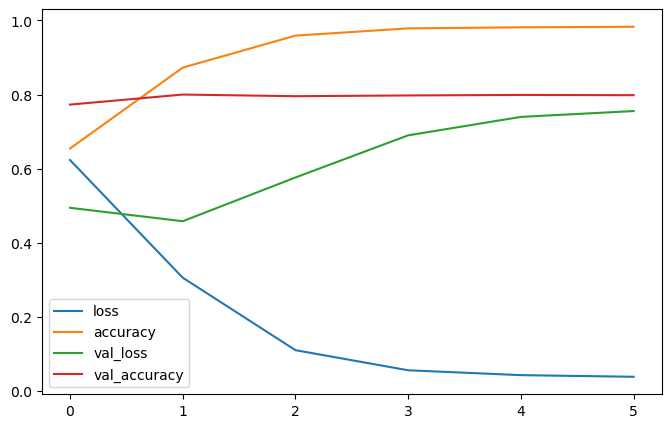

In [53]:
pd.DataFrame(history_DNN.history).plot(figsize=(8,5))

In [54]:
accuracy_DNN = evaluating_the_model(Dl_model , x_test_5 , y_test_5)[1]

93/93 [==============================] - 0s 976us/step - loss: 0.4648 - accuracy: 0.7990


In [66]:
dnn_comparison_table['question_step_number'].append("5.1")
dnn_comparison_table['model_name'].append("Fully Connected DNN")
dnn_comparison_table['parameters'].append("Dense->10, Dense->5, Dense->2\n loss:SparseCategoricalCrossentropy\noptimizer: adam")
dnn_comparison_table['accuracy'].append(accuracy_DNN)

In [67]:
write_dic(dnn_comparison_table,"dnn_comparison_table")

## [5.2] 

**CNN**

In [32]:
from keras.backend import clear_session
clear_session()

لازم نعمل طبقة امبادينغ للسامبلز 

In [45]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train_5)

x_train_53 = tokenizer.texts_to_sequences(sentences_train_5)
x_val_53 = tokenizer.texts_to_sequences(sentences_val_5)
x_test_53 = tokenizer.texts_to_sequences(sentences_test_5)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
print(sentences_train_5[2])
print(x_train_53[2])

56136
ZAINABKADYROV اللله يكون روسيا ثعالب الأرض
[96, 1, 196]


نعمل بادينغ للجمل بحيث يكون للكل الهم نفس الطول

In [46]:
maxlen = 200
x_train_53 = pad_sequences(x_train_53, padding='post', maxlen=maxlen)
x_val_53 = pad_sequences(x_val_53, padding='post', maxlen=maxlen)
x_test_53 = pad_sequences(x_test_53, padding='post', maxlen=maxlen)



In [34]:
embedding_dim = 100
cnn = Sequential()
cnn.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
cnn.add(layers.Conv1D(128, 5, activation='relu'))
cnn.add(layers.GlobalMaxPooling1D())
cnn.add(layers.Dense(16, activation='relu'))
cnn.add(layers.Dense(8, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

In [35]:
cnn.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'],)
cnn.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          5613600   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                        

In [30]:
y_train_53 = np.asarray(y_train_5).astype('float32').reshape((-1,1))

In [39]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history_CNN = cnn.fit(x_train_53, y_train_53,
                    epochs=20,
                    verbose=False,
                    validation_split=0.2,
                    batch_size=10,
                    callbacks = [callback])

In [41]:
evaluating_the_model(cnn , x_train_53 , y_train_5)

347/347 [==============================] - 2s 4ms/step - loss: 0.3054 - accuracy: 0.8840


[0.3053763508796692, 0.8839519619941711]

In [48]:
evaluating_the_model(cnn , x_test_53 , y_test_5)

93/93 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.7531


[0.5221638083457947, 0.753140926361084]

In [50]:
accuracy_CNN = evaluating_the_model(cnn , x_test_53 , y_test_5)[1]

93/93 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.7531


In [51]:
dnn_comparison_table = read_dic("dnn_comparison_table")

In [53]:
dnn_comparison_table['question_step_number'].append("5.2")
dnn_comparison_table['model_name'].append("CNN")
dnn_comparison_table['parameters'].append("embadding,Conv1D(128filter)(5kernal), globalMaxPooling\n denses(16,8,1sigmoid)\nloss:binary_cross\noptimizer: adam")
dnn_comparison_table['accuracy'].append(accuracy_CNN)

In [54]:
write_dic(dnn_comparison_table,"dnn_comparison_table")

<AxesSubplot:>

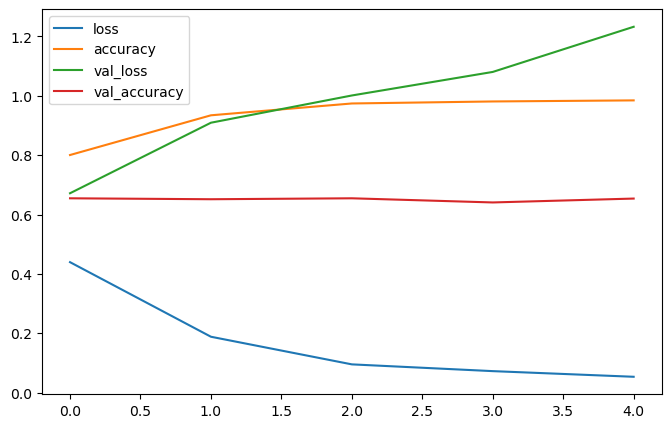

In [56]:
pd.DataFrame(history_CNN.history).plot(figsize=(8,5))

### Your best model

In [55]:
df = pd.DataFrame(dnn_comparison_table)
df = df.sort_values(by = 'accuracy' , ascending = False)
df.head()

,question_step_number,model_name,parameters,accuracy
0,5.1,Fully Connected DNN,"Dense->10, Dense->5, Dense->2\n loss:SparseCat...",0.793548
1,5.2,CNN,"embadding,Conv1D(128filter)(5kernal), globalMa...",0.753141


In [69]:
model_comparison_table

{'question_step_number': ['2', '3', '4'],
 'model_name': ['baseline logistic regression with bag of words',
  'logistic regression with bag of words',
  'logistic regression with tf-idf'],
 'parameters': ['default',
  'solver: liblinear',
  'solver: liblinear, min_df=5, max_df=0.7, ngram_range=(1, 3) , C=3'],
 'preprocessing_methods': ['none',
  'remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces',
  'remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces'],
 'accuracy': [0.8067911714770798, 0.8085685141108466, 0.7436246174770487]}

In [70]:
model_comparison_table = read_dic("model_comparison_table")

In [72]:
model_comparison_table['question_step_number'].append("5")
model_comparison_table['model_name'].append("DNN")
model_comparison_table['parameters'].append("Dense->10, Dense->5, Dense->2\n loss:SparseCategoricalCrossentropy\noptimizer: adam")
model_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces")
model_comparison_table['accuracy'].append(accuracy_DNN)

In [74]:
write_dic(model_comparison_table,"model_comparison_table")

non

## Print Table

In [77]:
model_comparison_table = read_dic("model_comparison_table")
df = pd.DataFrame(model_comparison_table)
df = df.sort_values(by = 'accuracy' , ascending = False)
df.head()

,question_step_number,model_name,parameters,preprocessing_methods,accuracy
1,3,logistic regression with bag of words,solver: liblinear,remove mentions + switch numbers + delete punc...,0.808569
0,2,baseline logistic regression with bag of words,default,none,0.806791
3,5,DNN,"Dense->10, Dense->5, Dense->2\n loss:SparseCat...",remove mentions + switch numbers + delete punc...,0.798981
2,4,logistic regression with tf-idf,"solver: liblinear, min_df=5, max_df=0.7, ngram...",remove mentions + switch numbers + delete punc...,0.743625


رح استخدم اول موديل مع عمليات التنظيف المناسبة 

# Question [6]: Train on all Classes

In [81]:
train_data_61 = train_data.copy(deep = True)
test_data_61 = test_data.copy(deep = True)

waleed.preprocesse_df(train_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

waleed.preprocesse_df(test_data_3,'text',
switch_numberss = True,
delete_puns = True,
delete_stop_wordss = True,
delete_white_spaces = True)

train_data_61 = waleed.delete_nan_duplicates(train_data_61)
test_data_61 = waleed.delete_nan_duplicates(test_data_61)

In [84]:
accuracy61 = my_model_cv(train_data_61, test_data_61)
print(accuracy61)

0.6795514901150782


In [91]:
model_comparison_table = read_dic("model_comparison_table")

In [92]:
model_comparison_table['question_step_number'].append("6.1")
model_comparison_table['model_name'].append("LR with BOW(all classes)")
model_comparison_table['parameters'].append("solver: liblinear")
model_comparison_table['preprocessing_methods'].append("remove mentions + switch numbers + delete punctuations + delete stope-words + delete spaces")
model_comparison_table['accuracy'].append(accuracy61)

In [93]:
write_dic(model_comparison_table,"model_comparison_table")

In [98]:
df = pd.DataFrame(read_dic('model_comparison_table'))
df

,question_step_number,model_name,parameters,preprocessing_methods,accuracy
0,2,baseline logistic regression with bag of words,default,none,0.806791
1,3,logistic regression with bag of words,solver: liblinear,remove mentions + switch numbers + delete punc...,0.808569
2,4,logistic regression with tf-idf,"solver: liblinear, min_df=5, max_df=0.7, ngram...",remove mentions + switch numbers + delete punc...,0.743625
3,5,DNN,"Dense->10, Dense->5, Dense->2\n loss:SparseCat...",remove mentions + switch numbers + delete punc...,0.798981
4,6.1,LR with BOW(all classes),solver: liblinear,remove mentions + switch numbers + delete punc...,0.679551


In [99]:
df.to_csv("[محمد_وليد_الطرزي].csv", index=False)

dealing with raSampling<br>
ماكملت الشغل منشان ما أتأخر اكتر

Class 0: 3496
Class 1: 5417
Class 2: 11484
Class 3: 5656


<AxesSubplot:title={'center':'Count (target)'}>

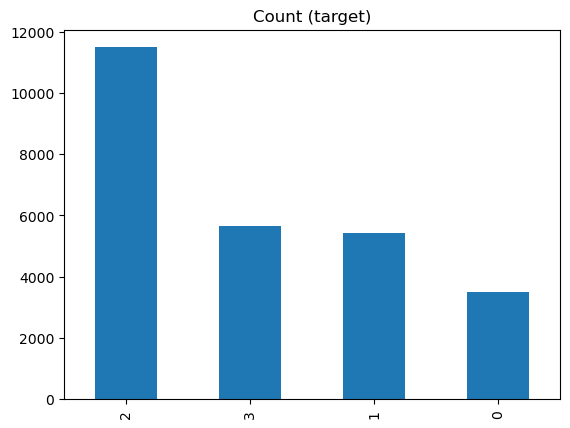

In [36]:
label_count = train_data.label_val.value_counts()
print('Class 0:', label_count[0])
print('Class 1:', label_count[1])
print('Class 2:', label_count[2])
print('Class 3:', label_count[3])

label_count.plot(kind='bar', title='Count (target)')

In [33]:
x_train_6,y_train_6 = x_y_split(train_data,'text','label_val')

In [95]:
count_class_0, count_class_1,count_class_2,count_class_3 = train_data.label_val.value_counts()

# Divide by class
df_class_0 = train_data[train_data['label_val'] == 0]
df_class_1 = train_data[train_data['label_val'] == 1]
df_class_2 = train_data[train_data['label_val'] == 2]
df_class_3 = train_data[train_data['label_val'] == 3]

## [6.2] 


## Resmapling